# Asg-4 focuses on 

## NFA2DFA (review) -- LT

## Reversal of NFA by hand -- XL

## Conversion to GNFA and Two Elimination Orders -- AR

## Chasing down the RE2NFA Components -- SV

## Here is the  plan

1. In LT, you will

    a. take a given nfa called nfa1
    
    b. convert it to dfa1 
    
    c. reverse nfa1 by hand obtaining rnfa1
    
    d. inspect and conclude (listing six paths) that rnfa1 is indeed a reverse of nfa1

2. In XL you will

    a. learn about a few DFA utilities such as totalize_dfa and dotObj_dfa_w_bh
    
    b. extract an RE by inspecting nfa1 and write it down as RE1_hand
    
    c. reverse RE1_hand by inspection, writing the result down as Rev_RE1_hand
    
    d. Understand the function del_gnfa_states via its help command
    

3. In AR you will

    a. obtain a GNFA for rnfa1, calling it grnfa1
    
    b. apply two elimination orders for states on grnfa1
    
    c. obtain Rev_RE1 and Rev_RE2
    
    d. check that Rev_RE1 and Rev_RE2 and Rev_RE1_hand are all isomorphic
    

4. In SV you will 

    a. print the NFA for Rev_RE2 and show where various stated paths exist
    
    b. print the NFA for Rev_RE1_hand and identify the same paths in your own RE

Please follow the instructions and submit your finished notebook as described in previous assignments.
 

# Asg-4 imports 


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

# 1. NFA to DFA by hand and Checking (LT) + Getting a simple RE

You are given this NFA below

## 1(a). nfa1 is given below

Questions follow under 1(b)

In [2]:
# Given NFA

nfa1 = md2mc('''NFA
I1 : '' -> B
I1 : a  -> I2

I2 : c  -> F3
I2 : b  -> B

B : s  -> B
B : d  -> F4
B : f  -> F3


''')


Generating LALR tables


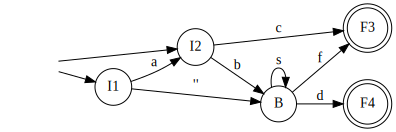

In [3]:
dotObj_nfa(nfa1)

## 1(b). Obtain the DFA of the above NFA by hand. I've given you a start.

1. Obtain the Eclosure of the initial NFA state. That is the DFA's initial state.

2. When we go from I1_I2_B (set of states corresponding to the Eclosure) and give that state 'a', it goes to "wasI2". This is no longer the initial state of the DFA, and hence called "wasI2".

3. Finish the remaining steps below.

Show your work by typing in the Eclosure details of each step wherever there is a $\varepsilon$ involved in a given DFA state

For DFA states where there is no $\varepsilon$ involved, just show the final Eclosed result.

Use as many bullets as necessary to clearly show your work:

*

*

*

*

*

In [4]:
# DFA of nfa1

dfa1 = md2mc('''DFA

I1_I2_B : a -> wasI2
I1_I2_B : b -> B
I1_I2_B : c -> F3
I1_I2_B : d -> F4
I1_I2_B : f -> F3 !! fixed following XL's comments

wasI2 : b -> B
wasI2 : c -> F3


B : s -> B
B : d -> F4
B : f -> F3

''')

Generating LALR tables


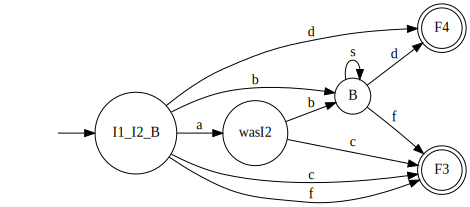

In [5]:
dotObj_dfa(dfa1)

## 1(c). Reverse nfa1 by hand, below. In doing so, it is helpful for me to suggest state renamings for you

1) Change F3 to I3

2) Change F4 to I4

3) Change I1 and I2 to F1 and F2

4) Now, reverse the transitions of nfa1, obtaining "rnfa1" below
 

In [6]:
# There is no Jove function to reverse automatically - do it by hand!

rnfa1 = md2mc('''
NFA

I3 : c -> F2
I3 : f -> B   !! This is OK; not affected by XL's comments

I4 : d -> B

B  : s -> B
B : b -> F2
B : '' -> F1

F2: a -> F1

''')

Generating LALR tables


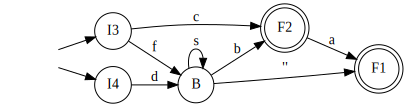

In [7]:
dotObj_nfa(rnfa1)

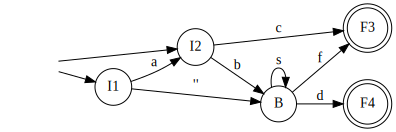

In [8]:
dotObj_nfa(nfa1)

## 1(d). Inspect and conclude that rnfa1 is truly the reverse of nfa1


### List the first six strings in numeric order and check that they have been correctly reversed. 

State the string in the original machine and explain (by specifying a path as a sequence of states) that this string is present in the reversed machine also.

1.

2.

3.

4.

5.

6.

 
 

# 2. Extraction of RE by Inspection (XL) and other things before it


## 2(a). You can totalize dfa1 to obtain the totalized machine

* Explain totalize_dfa in a few sentences below, by looking at the Delta before and After

In [9]:
tdfa1 = totalize_dfa(dfa1)

### Your explanation of totalize_dfa

*

*



##  A printout may look the same ... till you print w_bh 

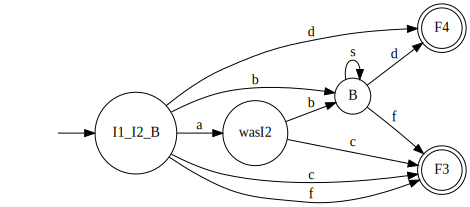

In [10]:
dotObj_dfa(tdfa1)

##  Let us print with blackhole

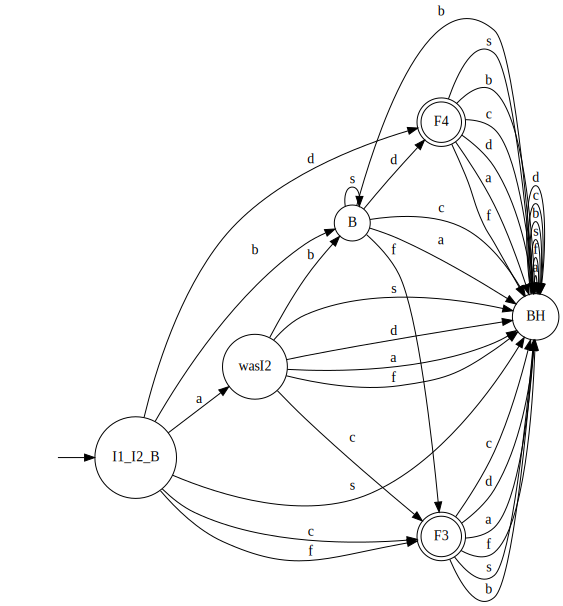

In [11]:
dotObj_dfa_w_bh(tdfa1)

### Was it a good idea to not always show black-holes?

* In what circumstances might you still need to apply the _w_bh view option?


An open-ended answer - anything you may think up can be a valuable piece of feedback for me


## 2(b) Obtain an RE by looking at nfa1

* Follow all paths

* Summarize the paths in your head, using the Star operator suitably




In [12]:
RE1_hand = "ac + abs*f + abs*d + c + bs*f + bs*d + d + f"  # Fixed by adding 'f'

## 2(c) Reverse RE1 by hand to obtain Rev_RE1

Once you have an RE, you can "visually reverse it" for simple REs

In [13]:
Rev_RE1_hand = " c + ca + (d+f)s*(''+b+ba) "  # 'f' already added-in cleverly!

## 2(d) Understand del_gnfa_states via help

In [14]:
# help of del_gnfa_states run below


### Document what you learned from the function help of del_gnfa_states and summarize below


*

*

*

# 3. Converting to GNFA and Attempting Two Elimination Orders (AR)

Work on rnfa1 to obtain Rev_RE1 and Rev_RE2 

## Obtain grnfa1 below via a suitable command

In [15]:
grnfa1 = mk_gnfa(rnfa1)

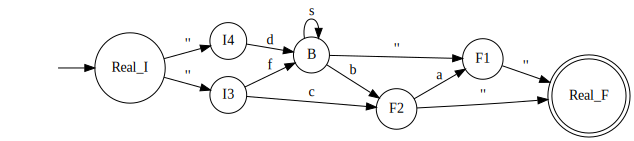

In [16]:
dotObj_gnfa(grnfa1)

## 3(b,c) i : Apply the elimination order by supplying the second argument 
['B', 'F2', 'F1', 'I3', 'I4']

as you learned in the help

In [17]:
(Gfinal, DO, Rev_RE1) = del_gnfa_states(grnfa1, ['B', 'F2', 'F1', 'I3', 'I4'])

**** Eliminating state B ****
**** Eliminating state F2 ****
**** Eliminating state F1 ****
**** Eliminating state I3 ****
**** Eliminating state I4 ****


In [18]:
Rev_RE1

'((((((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) + (d ((s)* b))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)))'

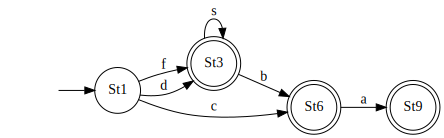

In [19]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))))

## 3(b,c) ii : Apply the elimination order by supplying the second argument 
['I3', 'I4', 'F1', 'B', 'F2' ]

as you learned in the help

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

DO[0] is the initial GNFA machine, DO[1] is the next one, and so on. You will see each step getting
rid of one state.

### Summarize your observation of the state elimination and which REs were introduced as a result. Use one bullet per question answered below.

*

*

*

*

*

*

*

In [20]:
(Gfinal, DO, Rev_RE2) = del_gnfa_states(grnfa1, ['I3', 'I4', 'F1', 'B', 'F2' ])

**** Eliminating state I3 ****
**** Eliminating state I4 ****
**** Eliminating state F1 ****
**** Eliminating state B ****
**** Eliminating state F2 ****


In [21]:
Rev_RE2

'((((((((d + f) + f) ((s)* b)) + c) + c) ((a + "") + "")) + (((d + f) + f) (s)*)) + (((d + f) + f) (s)*))'

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

### Summarize your observation of the state elimination and which REs were introduced as a result

*

*

*

*

*

*

*

## 3(d)i Check for isomorphism as requested between Rev_RE1 and Rev_RE2

Apply a Jove call that is compact (and is in my lecture slides) that checks that Rev_RE1 and Rev_RE2 
are equivalent. It has to involve iso_dfa and min_dfa and other calls.

In [22]:
iso_dfa( min_dfa(nfa2dfa(re2nfa(Rev_RE1))),
         min_dfa(nfa2dfa(re2nfa(Rev_RE2)))  )

True

In [23]:
Rev_RE1_hand

" c + ca + (d+f)s*(''+b+ba) "

## 3(d)i Check for isomorphism as requested between Rev_RE1 and Rev_RE1_hand

Same methods as above.

In [24]:
iso_dfa( min_dfa(nfa2dfa(re2nfa(Rev_RE1))),
         min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand)))  )

True

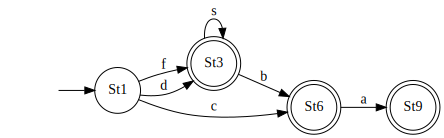

In [25]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))))

In [26]:
Rev_RE1_hand

" c + ca + (d+f)s*(''+b+ba) "

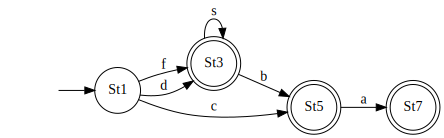

In [27]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand))))

# Chasing down the RE2NFA components (SV)

Find out where the s* components are and explain the set of all strings that precede s* in Rev_RE2 and the NFA of Rev_RE2

Find out where the ending "a" is, and find out the set of all the symbols that precede a

You must 

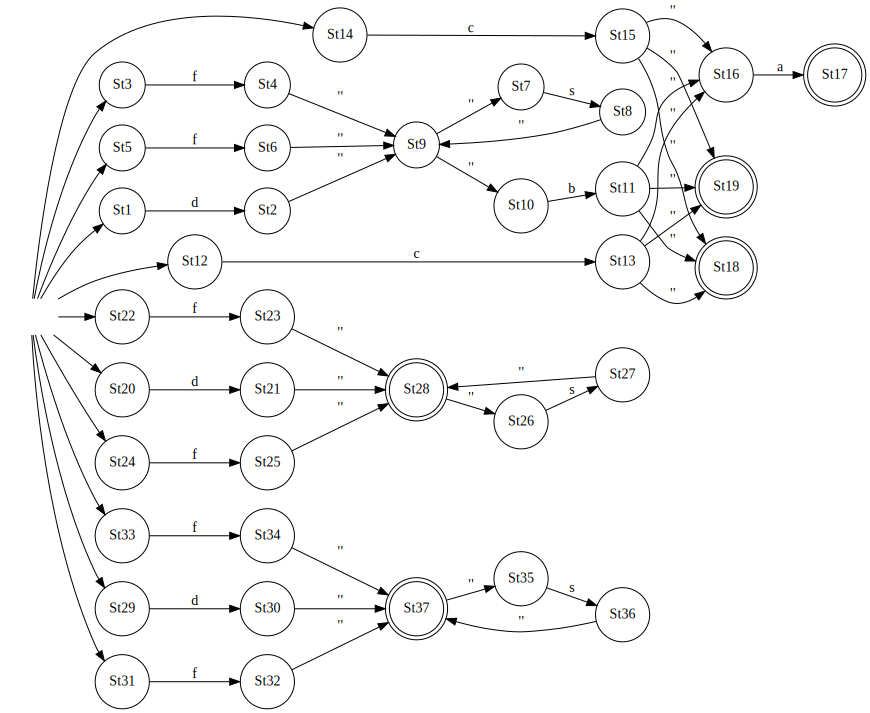

In [28]:
dotObj_nfa(re2nfa(Rev_RE2))

# Chasing down the RE2NFA components (SV)

Find out where the s* components are and explain the set of all strings that precede s* in Rev_RE2 and the NFA of Rev_RE2

Find out where the ending "a" is, and find out the set of all the symbols that precede a

Your answer is a series of bullets that explains which pieces of the NFA diagram came from which pieces of the RE. There is no single answer. Cover at least five cases.

*

*

*

*

*


## Repeat finding out the aforesaid paths in your own Rev_RE1_hand


Cover at least five cases

*

*

*

*

*

# END
